In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

df=pd.read_csv('gdrive/MyDrive/train.csv')
Test=pd.read_csv('gdrive/MyDrive/test.csv')

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
print(df.shape)
print(' ')
print(df.info())
print(' ')
df.describe()

(8693, 14)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
 


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
test_id = Test["PassengerId"]

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
 


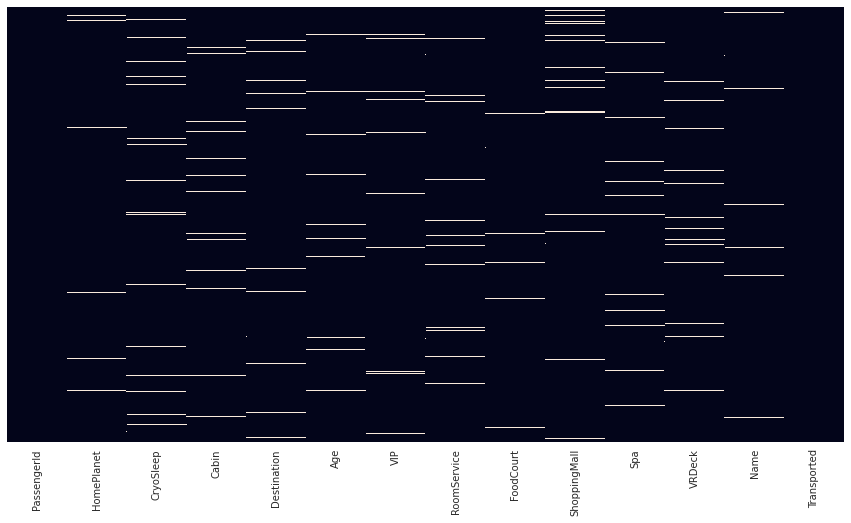

In [ ]:
print(df.isnull().sum())
print(' ')
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
 


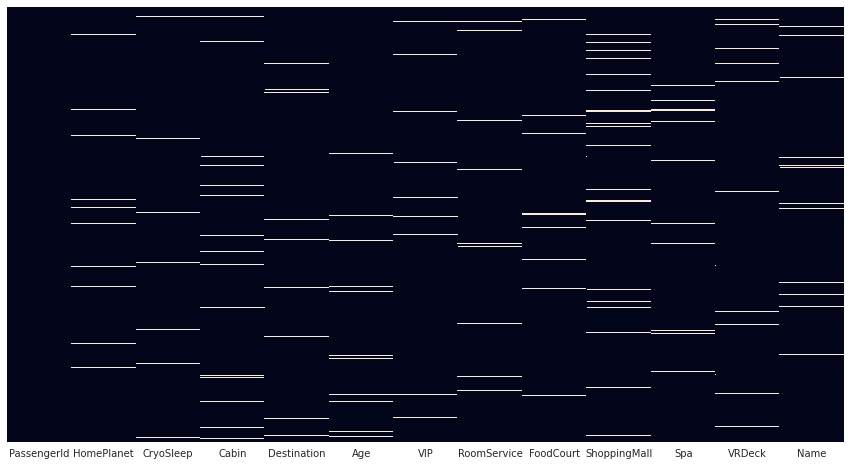

In [ ]:
print(Test.isnull().sum())
print(' ')
sns.heatmap(Test.isnull(), yticklabels=False, cbar=False)

In [ ]:
cols=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in cols:
  print (df[col].value_counts())
  print (' ') 

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
 
False    5439
True     3037
Name: CryoSleep, dtype: int64
 
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
 
False    8291
True      199
Name: VIP, dtype: int64
 


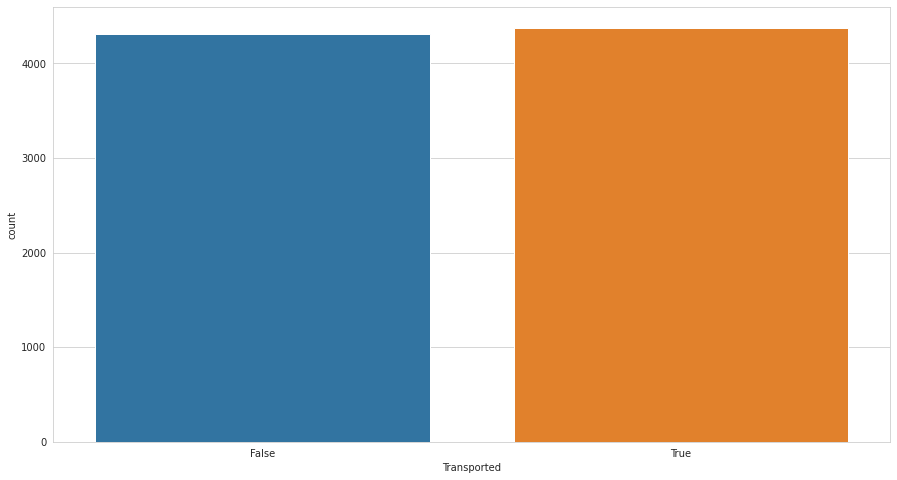

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported',data=df)

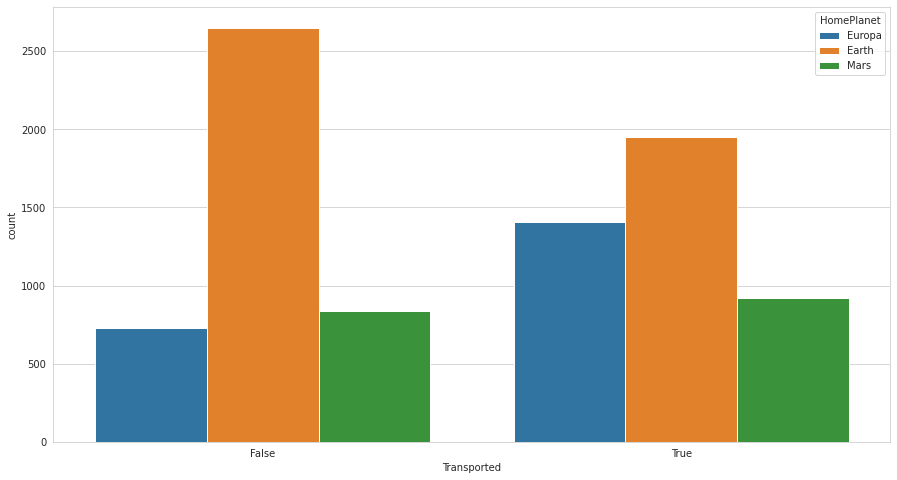

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='HomePlanet', data=df)
rcParams['figure.figsize'] = 15,8


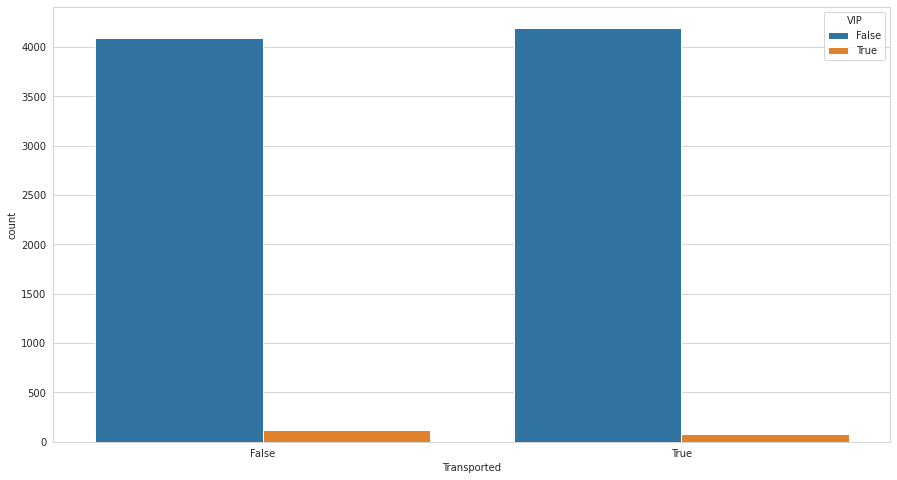

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='VIP', data=df)

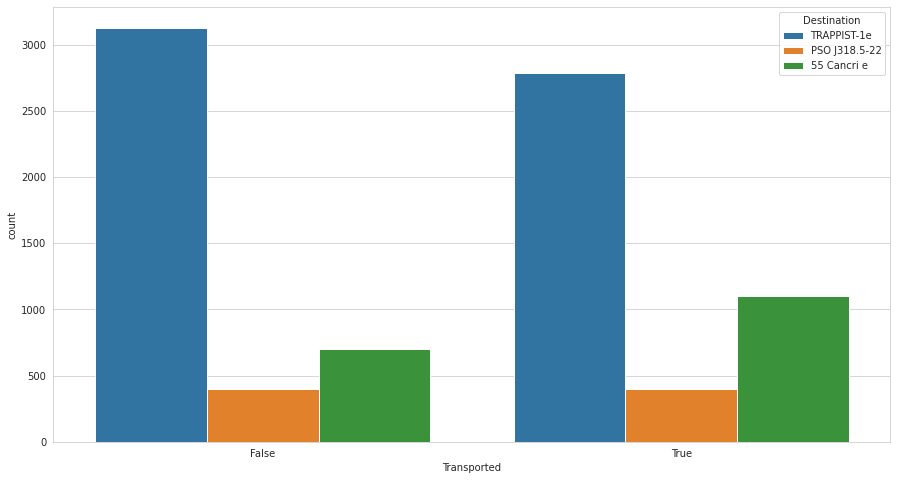

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='Destination', data=df)

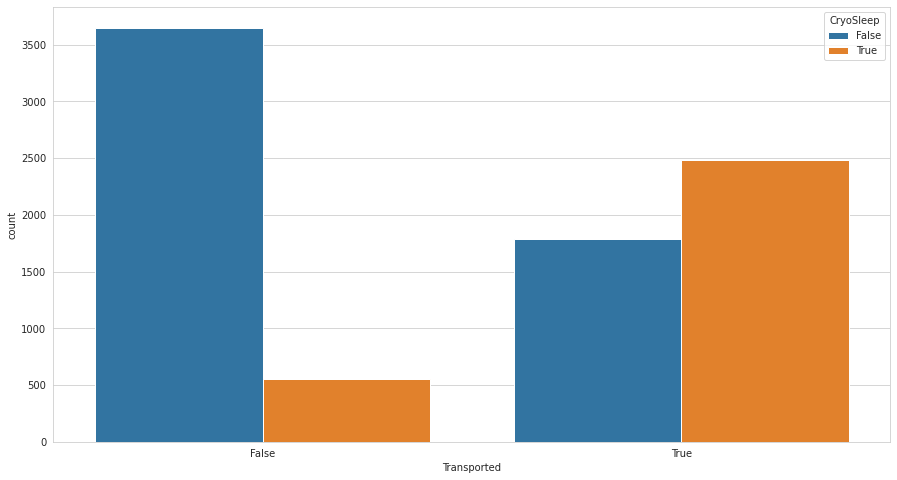

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Transported', hue='CryoSleep', data=df)

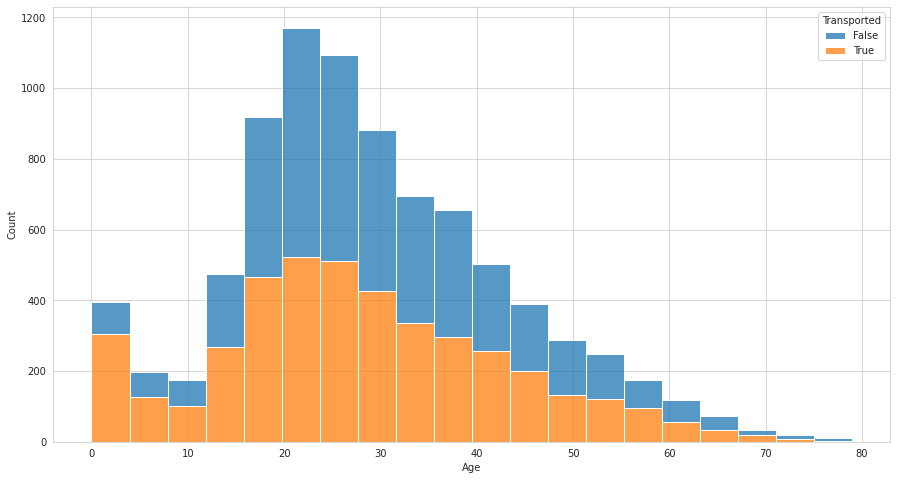

In [ ]:
sns.histplot(data=df, x="Age", bins=20, hue="Transported", multiple="stack")

In [ ]:
cols=['Age', 'RoomService', 'FoodCourt']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  Test[col]=pd.to_numeric(df[col], errors='coerce')

df['Transported'] =df['Transported'].map({True: 'True', False: 'False'})

In [ ]:
df.Cabin.str.split('/',expand = True)
df['Cabin_Deck'] = df.Cabin.str.split('/',expand = True)[0]
df['Cabin_Side'] = df.Cabin.str.split('/',expand = True)[2]
df

Test.Cabin.str.split('/',expand = True)
Test['Cabin_Deck'] = Test.Cabin.str.split('/',expand = True)[0]
Test['Cabin_Side'] = Test.Cabin.str.split('/',expand = True)[2]
Test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Deck,Cabin_Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,24.0,False,109.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,58.0,False,43.0,3576.0,0.0,0.0,0.0,Sabih Unhearfus,C,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,33.0,False,0.0,1283.0,0.0,181.0,585.0,Meratz Caltilter,C,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,16.0,False,303.0,70.0,635.0,0.0,0.0,Brence Harperez,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,42.0,False,0.0,1.0,0.0,0.0,0.0,Jeron Peter,G,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,180.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,43.0,False,375.0,103.0,0.0,0.0,0.0,Jayrin Pore,D,P
4275,9273_01,Europa,False,D/297/P,NaN,55.0,False,0.0,102.0,0.0,0.0,523.0,Kitakan Conale,D,P


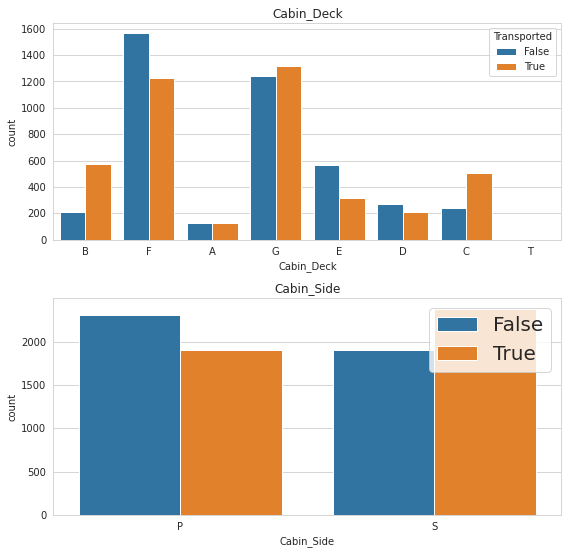

In [ ]:
fig=plt.figure(figsize=(8,15))
for i, var_name in enumerate(['Cabin_Deck','Cabin_Side']):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.legend(fontsize='20')
plt.show()

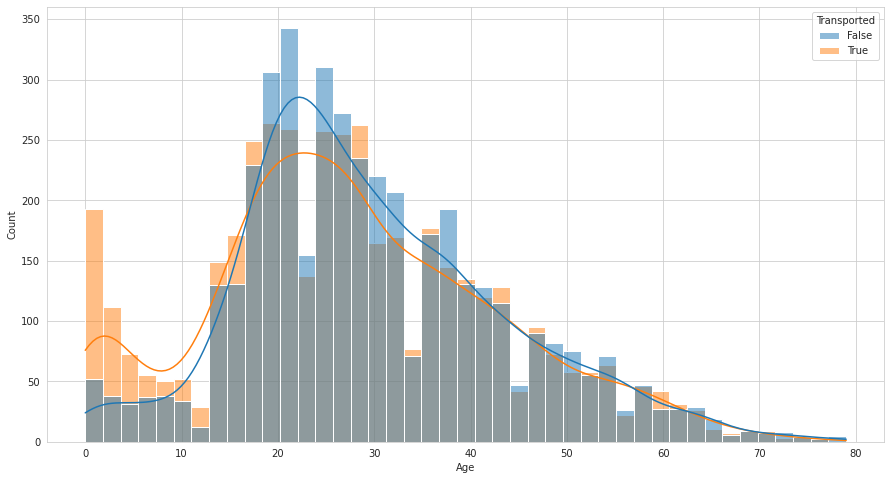

In [ ]:
sns.histplot(x='Age', data=df, hue='Transported', kde=True)

In [ ]:
def clean(df):
  cols=['HomePlanet', 'CryoSleep', 'VIP', 'Destination']
  for col in cols:
    df[col]=df[col].fillna(df[col].mode()[0])
  return df    

df=clean(df)
Test=clean(Test)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])
df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']] = imputer.transform(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])
Test[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']] = imputer.transform(Test[['ShoppingMall', 'VRDeck','Age','RoomService', 'FoodCourt', 'Spa']])

In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Cabin_Deck      199
Cabin_Side      199
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
 14  Cabin_Deck    8494 non-null   object 
 15  Cabin_Side    8494 non-null   object 
dtypes: bool(2), float64(6), object(8)
memory usage: 967.9+ KB


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["CryoSleep", "HomePlanet", "Destination", "VIP"]

for col in cols:
  df[col]=le.fit_transform(df[col])
  Test[col]=le.transform(Test[col])
  print(le.classes_)

cols = ["Transported"]

for col in cols:
  df[col]=le.fit_transform(df[col])
  #Test[col]=le.transform(Test[col])
  print(le.classes_)

[False  True]
['Earth' 'Europa' 'Mars']
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
[False  True]
['False' 'True']


In [ ]:
#df.drop(['PassengerId'], axis=1, inplace=True)
def clean(df):
    df = df.drop(["PassengerId" ,"Cabin_Deck", "Cabin_Side","Cabin", "Name", ], axis=1)
    return df

df=clean(df)
Test=clean(Test)

In [ ]:
df.shape

(8693, 11)

In [ ]:
df.info()
print (' ')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 747.2 KB
 


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [ ]:
print(df.isnull().sum())
print (' ')
Test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
 


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
## Check for unique labels in each column
for col in df.columns:
    print(len(df[col].value_counts()))

3
2
3
81
2
1274
1508
1116
1328
1307
2


In [ ]:
#from sklearn.linear_model import LogisticRegression

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
#y_test=Test.iloc[:,-1].values

In [ ]:
df.info()
print (' ')
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 747.2 KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int64  
 1   CryoSleep     4277 non-null   int64  
 

In [ ]:
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Test=sc.transform(Test.values)

In [ ]:
def acc(classifier,x_test):

    y_pred = classifier.predict(x_test)
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier, X_test)

[[336 102]
 [ 97 335]]
0.771264367816092


In [ ]:
transportedpred=classifier.predict(Test)

transportedpredframe=pd.DataFrame(transportedpred, columns=['Transported'])

transportedpredframe['Transported']=transportedpredframe['Transported'].replace(1, "True")

transportedpredframe['Transported']=transportedpredframe['Transported'].replace(0, "False")

In [ ]:
transportedpredframe

,Transported
0,True
1,False
2,True
3,False
4,False
...,...
4272,True
4273,False
4274,True
4275,False


In [ ]:
passee=pd.DataFrame(test_id, columns=['PassengerId'])

In [ ]:
sub=pd.concat([passee,transportedpredframe], axis=1)
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
sub.to_csv("Submission.csv", index=False)